In [1]:
import dill
import math
import numpy as np
from pprint import pprint
from bayes_opt import BayesianOptimization

CURRENT_YEAR = 2023
MAX_YEAR = 2123
years = list(range(CURRENT_YEAR, MAX_YEAR))
delays = {}

exec(open('utils.py').read())
print('Loaded')

Loaded


## Algorithms/insights delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 13        | -0.2278   | 5.537     | 9.08      | 0.2381    |
| 28        | -0.1015   | 1.405     | 6.48      | 0.2005    |
| 55        | -0.06886  | 1.147     | 6.491     | 0.3256    |
| 75        | -0.03808  | 0.86      | 7.209     | 0.3689    |
| 118       | -0.03105  | 0.2825    | 7.31      | 0.5375    |
Curve params found
{'push': 0.28245856310263356,
 'shift': 7.310013987401996,
 'slope': 0.5375424670440259}
-
## Chance of nonscaling delay ##


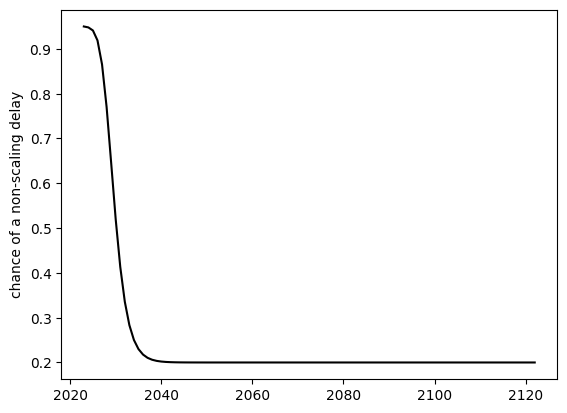

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 95%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 95%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 94%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 92%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 87%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 77%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 65%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 52%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 41%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 34%
Year: 2033

In [2]:
nonscaling_points = [(2023, 0.95),
                     (2027, 0.8),
                     (2030, 0.5),
                     (2035, 0.3),
                     (2050, 0.2)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['algorithms'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.9, sq.lognorm(3, 10)], [0.1, sq.lognorm(3, 30)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['algorithms']['length'] @ 1000, digits=0))

## Data delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 10        | -0.2221   | 1.68      | 6.632     | 0.1781    |
| 88        | -0.2029   | 0.01      | 10.0      | 2.28      |
| 95        | -0.0119   | 0.01      | 10.0      | 1.284     |
Curve params found
{'push': 0.01, 'shift': 10.0, 'slope': 1.2842739225015023}
-
## Chance of nonscaling delay ##


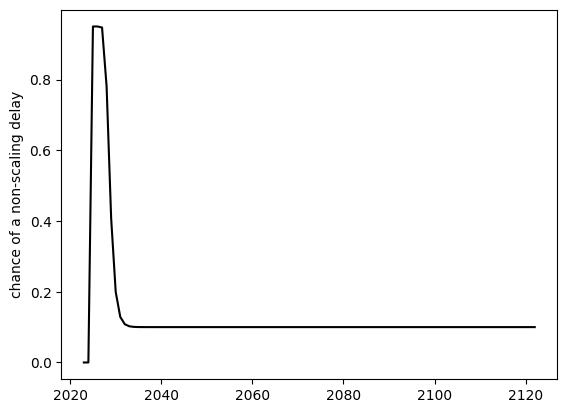

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 0%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 0%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 95%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 95%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 95%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 78%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 41%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 20%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 13%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 11%
Year: 2033 -

In [3]:
nonscaling_points = {'points': [(2023, 0.95),
                                (2027, 0.9),
                                (2030, 0.2),
                                (2050, 0.1)],
                     'init': 2024}
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['data'] = {'prob': p_nonscaling_delay, 'length': sq.lognorm(3, 10)}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['data']['length'] @ 1000, digits=0))

## Robotics need delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 9         | -0.075    | 0.1063    | 7.816     | 9.805     |
| 41        | -0.07495  | 0.01      | 10.0      | 2.122     |
Curve params found
{'push': 0.01, 'shift': 10.0, 'slope': 2.121504173961793}
-
## Chance of nonscaling delay ##


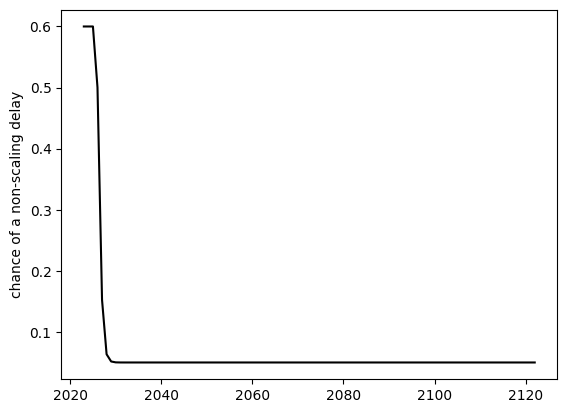

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 60%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 60%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 60%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 50%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 15%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 6%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2033 - ch

In [4]:
nonscaling_points = [(2023, 0.6),
                     (2030, 0.3),
                     (2040, 0.1),
                     (2050, 0.05)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['robotics'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.85, sq.lognorm(3, 10)],
                                                                        [0.15, sq.lognorm(7, 20)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['robotics']['length'] @ 1000, digits=0))

## Integration delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 13        | -0.05     | 0.03901   | 2.394     | 7.944     |
| 41        | -0.05     | 0.01      | 4.685     | 9.812     |
| 43        | -0.05     | 0.01      | 6.364     | 3.172     |
| 50        | -0.03536  | 0.03922   | 8.108     | 0.5431    |
| 120       | -0.0335   | 0.1482    | 8.479     | 0.744     |
Curve params found
{'push': 0.14816816054742962,
 'shift': 8.479031624548806,
 'slope': 0.7439781766671667}
-
## Chance of nonscaling delay ##


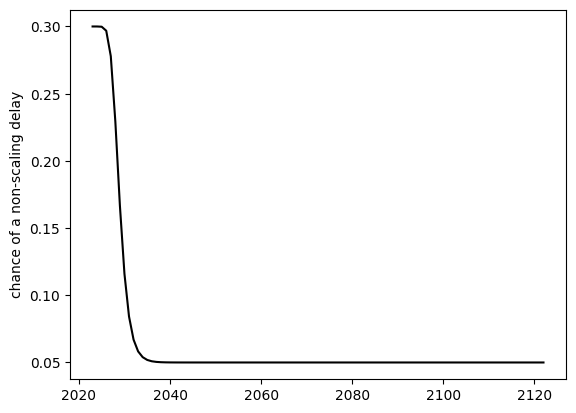

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 28%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 23%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 17%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 12%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 8%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 7%
Year: 2033 -

In [5]:
nonscaling_points = [(2023, 0.3),
                     (2030, 0.2),
                     (2040, 0.1),
                     (2050, 0.05)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['integration'] = {'prob': p_nonscaling_delay, 'length': sq.lognorm(5, 50)}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['integration']['length'] @ 1000, digits=0))

##  Real world feedback delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 4         | -0.01674  | 0.376     | 8.797     | 4.639     |
| 26        | -0.01183  | 1.125     | 9.844     | 0.1879    |
Curve params found
{'push': 1.1251568479547434,
 'shift': 9.843847880969765,
 'slope': 0.1879138086596775}
-
## Chance of nonscaling delay ##


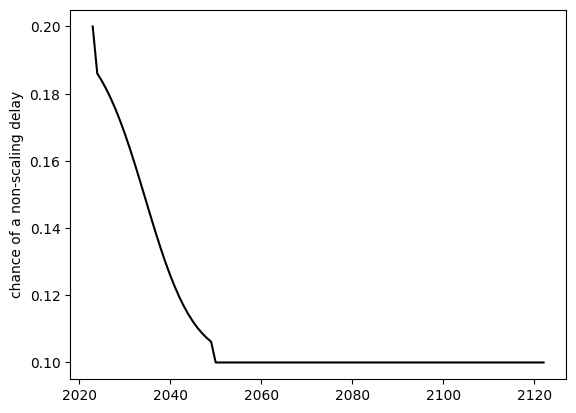

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 20%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 19%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 18%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 18%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 18%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 18%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 17%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 17%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 16%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 16%
Year: 2033

In [6]:
nonscaling_points = [(2023, 0.2),
                     (2030, 0.15),
                     (2050, 0.1)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['real_world_feedback'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.6, sq.lognorm(3, 10)],
                                                                                   [0.3, sq.lognorm(10, 30)],
                                                                                   [0.1, sq.lognorm(20, 50)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['real_world_feedback']['length'] @ 1000, digits=0))

## Policy delay (e.g., pause)

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 41        | -0.1      | 0.01      | 10.0      | 6.176     |
| 43        | -0.09999  | 0.01      | 6.768     | 2.26      |
| 100       | -0.09997  | 0.01      | 5.406     | 2.094     |
| 117       | -0.09978  | 0.01      | 7.532     | 1.851     |
Curve params found
{'push': 0.01, 'shift': 7.531763776035725, 'slope': 1.8505273018019475}
-
## Chance of nonscaling delay ##


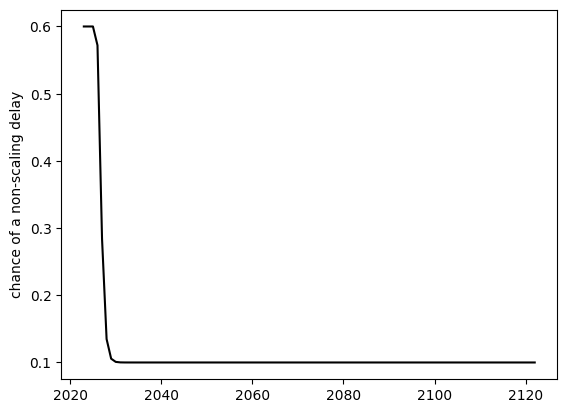

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 60%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 60%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 60%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 57%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 28%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 13%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 11%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2033

In [7]:
nonscaling_points = [(2023, 0.6),
                     (2030, 0.4),
                     (2050, 0.2),
                     (2080, 0.1)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['policy_pause'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.95, sq.lognorm(1, 5)],
                                                                            [0.05, sq.lognorm(10, 100)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['policy_pause']['length'] @ 1000, digits=0))

## Save

In [8]:
with open('caches/nonscaling_delays.dill', 'wb') as f:
    dill.dump(delays, f)
    
print('cached!')

cached!
